In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:

sigmas = []
n_ranges = np.arange(100, 1000, 100)
for n in n_ranges:
    N = (n+1) * n / 2
    upper_triangle_indices = np.triu_indices(n, k=1)
    upper_triangle_indices_include_diagonal = np.triu_indices(n, k=0)
    sigma = np.zeros((n,n))
    for i in range(n):
        vi_1 = np.zeros(n)
        vi_2 = np.zeros((n,n))
        Ai = np.zeros((n,n))
        vi_1[i] = 2/np.sqrt(n)
        vi_2[i, :]=1/np.sqrt(n)
        vi_2[:, i]=1/np.sqrt(n)
        vi_2 = vi_2[upper_triangle_indices]
        vi = np.concatenate((vi_1, vi_2))
        Ai[upper_triangle_indices_include_diagonal] = vi
        Ai_T = Ai.T.copy()
        np.fill_diagonal(Ai_T, 0)
        Ai = Ai + Ai_T
        sigma += Ai @ Ai
    A = np.ones((n,n)) * np.sqrt(2) / n
    sigma += A @ A.T
    spectral_norm = np.linalg.norm(sigma, ord=2)
    sigmas.append(np.sqrt(spectral_norm))
    print(n, spectral_norm)



100 71.67857910592146
200 139.20083637105117
300 206.74249683232438
400 274.2891321608745
500 341.83777756712385
600 409.3874336345216
700 476.9376692941017
800 544.4882681068211
900 612.0391094706694


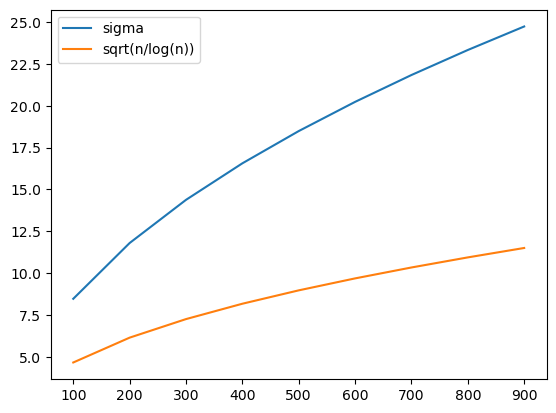

In [43]:

plt.plot(n_ranges, sigmas, label='sigma')
x = np.sqrt(n_ranges/np.log(n_ranges))
plt.plot(n_ranges, x, label="sqrt(n/log(n))")
plt.legend()

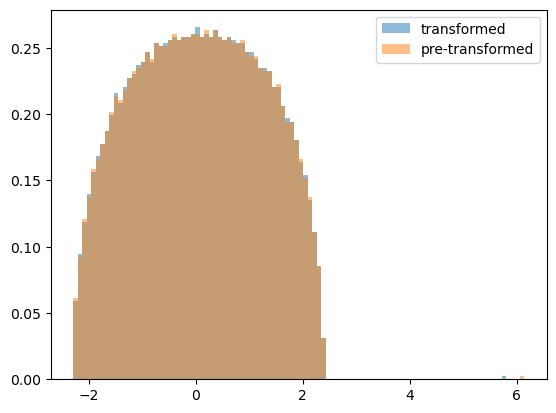

In [107]:
n=5000
c=5
off_diag = np.random.randn((n*(n-1)//2))
on_diag = np.random.randn(n) * 2
upper_triangle_indices = np.triu_indices(n, k=1)
A = np.zeros((n,n))
A[upper_triangle_indices] = off_diag
A += A.T
np.fill_diagonal(A, on_diag)

subset_size = int(c * np.sqrt(n))
subset = np.random.choice(range(n), subset_size, replace=False)
A[np.ix_(subset, subset)] += 1
A /= np.sqrt(n)
d = A @ np.ones(n)
L = A + np.diag(np.tanh(d))
evals = np.linalg.eigvalsh(L)
P = np.eye(n) - np.ones((n,n))/n
transformed_L = P @ L @ P
transformed_evals = np.linalg.eigvalsh(transformed_L)
bins = np.histogram_bin_edges(np.concatenate((evals, transformed_evals)), bins=100)
plt.hist(transformed_evals, bins=bins, label="transformed", alpha=0.5, density=True)
plt.hist(evals, bins=bins, label="pre-transformed", alpha=0.5, density=True)
plt.legend()
plt.show()

In [6]:
c = 5
pre_transformed_dict = {}
transformed_dict = {}
n_ranges = np.arange(8000, 16000, 500)
num_trials=50
for n in n_ranges:
    upper_triangle_indices = np.triu_indices(n, k=1)
    eval1 = []
    eval2 = []
    for _ in range(num_trials):
        off_diag = np.random.randn((n * (n - 1) // 2))
        on_diag = np.random.randn(n) * 2
        A = np.zeros((n, n))
        A[upper_triangle_indices] = off_diag
        A += A.T
        np.fill_diagonal(A, on_diag)

        subset_size = int(c * np.sqrt(n))
        subset = np.random.choice(range(n), subset_size, replace=False)
        A[np.ix_(subset, subset)] += 1
        A /= np.sqrt(n)
        d = A @ np.ones(n)
        L = A + np.diag(np.tanh(d))
        evals = np.linalg.eigvalsh(L)
        P = np.eye(n) - np.ones((n, n)) / n
        transformed_L = P @ L @ P
        transformed_evals = np.linalg.eigvalsh(transformed_L)
        eval1.append(np.max(evals))
        eval2.append(np.max(transformed_evals))
    pre_transformed_dict[n] = np.array(eval1)
    transformed_dict[n] = np.array(eval2)

In [4]:
def layer_plot(
    ax,
    xs,
    yss,
    max_points=None,
    label=None,
    only_means=False,
    errorbars=False,
    color=None,
    sigma=1.0,
    fill_alpha=0.3,
    linestyle="-",
    linewidth=1,
    elinewidth=1,
):
    means = np.array([np.mean(ys) for ys in yss])
    devs = np.array([np.std(ys) * sigma for ys in yss])
    print(means)
    if max_points is not None:
        n = xs.shape[0]
        thin = max(1, n // max_points)
        xs = xs[::thin]
        means = means[::thin]
        devs = devs[::thin]
    if errorbars:
        ax.scatter(xs, means, c=color, label=label)
        ax.errorbar(
            xs,
            means,
            yerr=devs,
            linestyle=linestyle,
            linewidth=linewidth,
            elinewidth=elinewidth,
            c=color,
        )
    else:
        ax.plot(xs, means, c=color, label=label, linestyle=linestyle, linewidth=linewidth)
        if not only_means:
            ax.fill_between(xs, means, means + devs, alpha=fill_alpha, color=color)
            ax.fill_between(xs, means, means - devs, alpha=fill_alpha, color=color)

In [1]:
transformed = [transformed_dict[n] for n in n_ranges]
pre_transformed = [pre_transformed_dict[n] for n in n_ranges]
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
layer_plot(ax, n_ranges, transformed, label='transformed', errorbars=False, color = "blue")
layer_plot(ax, n_ranges, pre_transformed, label='pre_transformed', errorbars=False, color = "orange")
ax.set_xlabel('n')
ax.set_ylabel('Maximum Eigenvalue')
ax.legend()
plt.show()

NameError: name 'n_ranges' is not defined

In [ ]:
transformed = [transformed_dict[n] for n in n_ranges]
pre_transformed = [pre_transformed_dict[n] for n in n_ranges]
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
layer_plot(ax, n_ranges, transformed, label="transformed", errorbars=False, color="blue")
layer_plot(ax, n_ranges, pre_transformed, label="pre_transformed", errorbars=False, color="orange")
ax.set_xlabel("n")
ax.set_ylabel("Maximum Eigenvalue")
ax.legend()
plt.show()

In [5]:
import numpy as np
def generate_goe(n):
    off_diag = np.random.randn((n * (n - 1) // 2))
    on_diag = np.random.randn(n) * 2
    upper_triangle_indices = np.triu_indices(n, k=1)
    A = np.zeros((n, n))
    A[upper_triangle_indices] = off_diag
    A += A.T
    np.fill_diagonal(A, on_diag)
    return A

def generate_er(n):
    off_diag = np.random.choice([0, 1], size=n * (n - 1) // 2, p=[1/2, 1/2])
    upper_triangle_indices = np.triu_indices(n, k=1)
    A = np.zeros((n, n))
    A[upper_triangle_indices] = off_diag
    A += A.T
    return A

def plant_clique(A, c):
    n = A.shape[0]
    subset_size = int(c * np.sqrt(n))
    subset = np.random.choice(range(n), subset_size, replace=False)
    A[np.ix_(subset, subset)] = 1
    np.fill_diagonal(A, 0)
    return A, subset

def plant_subset(A, c):
    n = A.shape[0]
    subset_size = int(c * np.sqrt(n))
    subset = np.random.choice(range(n), subset_size, replace=False)
    A[np.ix_(subset, subset)]+= 1
    return A, subset


In [7]:
n = 100
A = generate_er(n)
A,subset = plant_clique(A, 1)
d = A @ np.ones(n)
L = A + np.diag(np.tanh(d))

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


In [50]:
import numpy as np

def gram_schmidt(vectors):
    num_vectors = len(vectors)
    orthogonal_vectors = np.zeros_like(vectors)

    for i in range(num_vectors):
        orthogonal_vectors[i] = vectors[i]
        for j in range(i):
            orthogonal_vectors[i] -= np.dot(vectors[i], orthogonal_vectors[j]) * orthogonal_vectors[j]
        orthogonal_vectors[i] /= np.linalg.norm(orthogonal_vectors[i])
    return orthogonal_vectors

n = 5
vectors = np.zeros((n, n))
for i in range(n):
    vectors[i] = np.zeros(n)
    vectors[i][:n-i-1]=1
    vectors[i][n-i-1] = i+1
print(vectors)
orthogonal_vectors = gram_schmidt(vectors)
print(orthogonal_vectors)
for i in range(n):
    for j in range(n):
        print(i,j, np.dot(orthogonal_vectors[i], orthogonal_vectors[j]))
Q = np.stack(orthogonal_vectors, axis=1)
print(Q@Q.T, Q.T@Q)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 0.]
 [1. 1. 3. 0. 0.]
 [1. 4. 0. 0. 0.]
 [5. 0. 0. 0. 0.]]
[[ 0.4472136   0.4472136   0.4472136   0.4472136   0.4472136 ]
 [ 0.          0.          0.          0.70710678 -0.70710678]
 [ 0.          0.          0.81649658 -0.40824829 -0.40824829]
 [ 0.          0.8660254  -0.28867513 -0.28867513 -0.28867513]
 [ 0.89442719 -0.2236068  -0.2236068  -0.2236068  -0.2236068 ]]
0 0 0.9999999999999999
0 1 0.0
0 2 0.0
0 3 -5.551115123125783e-17
0 4 2.7755575615628914e-17
1 0 0.0
1 1 0.9999999999999998
1 2 0.0
1 3 0.0
1 4 0.0
2 0 0.0
2 1 0.0
2 2 1.0000000000000002
2 3 0.0
2 4 0.0
3 0 -5.551115123125783e-17
3 1 0.0
3 2 0.0
3 3 1.0000000000000002
3 4 2.7755575615628914e-17
4 0 2.7755575615628914e-17
4 1 0.0
4 2 0.0
4 3 2.7755575615628914e-17
4 4 1.0
[[ 1.00000000e+00 -6.29746170e-18 -6.29746170e-18 -6.29746170e-18
  -6.29746170e-18]
 [-6.29746170e-18  1.00000000e+00 -6.78145736e-17 -6.78145736e-17
  -6.78145736e-17]
 [-6.29746170e-18 -6.78145736e-17  1.00000000e+00

In [20]:
import numpy as np
n=5
Q = np.zeros((n,n))
Q[:,0] = np.ones(n) / np.sqrt(n)
Q[0,1] = np.sqrt((n-1)/n)
Q[1:,1] = -np.ones(n-1) / np.sqrt(n*(n-1))
for k in range(2,n):
    print(n-k+2, k)
    Q[n-k,k]= np.sqrt((k-1)/(k))
    Q[n-k+1:, k] = -np.ones(k-1) / np.sqrt((k-1)*(k))
print(Q)
print(np.round(Q@Q.T,3))
print(np.round(Q.T@Q,3))

5 2
4 3
3 4
[[ 0.4472136   0.89442719  0.          0.          0.        ]
 [ 0.4472136  -0.2236068   0.          0.          0.8660254 ]
 [ 0.4472136  -0.2236068   0.          0.81649658 -0.28867513]
 [ 0.4472136  -0.2236068   0.70710678 -0.40824829 -0.28867513]
 [ 0.4472136  -0.2236068  -0.70710678 -0.40824829 -0.28867513]]
[[ 1. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1. -0. -0.]
 [-0. -0. -0.  1.  0.]
 [-0. -0. -0.  0.  1.]]
[[ 1. -0.  0. -0. -0.]
 [-0.  1. -0.  0.  0.]
 [ 0. -0.  1. -0. -0.]
 [-0.  0. -0.  1.  0.]
 [-0.  0. -0.  0.  1.]]


(array([ 3.,  0.,  1.,  0.,  1.,  0.,  2.,  2.,  0.,  3.,  0.,  4.,  1.,
         4.,  2.,  2.,  5.,  8.,  6.,  6.,  9., 13.,  9.,  8., 11.,  8.,
         9., 11., 15., 17., 17., 17., 14., 22., 24., 17., 22., 20., 23.,
        21., 22., 23., 28., 21., 27., 23., 24., 24., 19., 20., 30., 21.,
        27., 26., 31., 23., 19., 16., 14., 15., 17., 18., 12., 12., 12.,
        11., 12.,  9.,  7.,  3.,  9., 12.,  7.,  7.,  5.,  3.,  5.,  2.,
         4.,  5.,  2.,  2.,  0.,  1.,  1.,  1.,  0.,  2.,  0.,  4.,  0.,
         1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.7806852 , 0.78105566, 0.78142611, 0.78179656, 0.78216702,
        0.78253747, 0.78290793, 0.78327838, 0.78364883, 0.78401929,
        0.78438974, 0.78476019, 0.78513065, 0.7855011 , 0.78587156,
        0.78624201, 0.78661246, 0.78698292, 0.78735337, 0.78772383,
        0.78809428, 0.78846473, 0.78883519, 0.78920564, 0.78957609,
        0.78994655, 0.790317  , 0.79068746, 0.79105791, 0.79142836,
        0.79179882, 0.7921

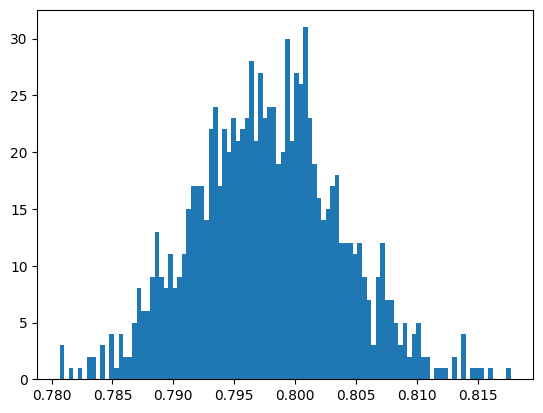

In [13]:
import numpy as np
import matplotlib.pyplot as plt
N=1000
n=10000
g = np.random.randn(N, n)
a = np.linalg.norm(g, axis=1,ord=1) / np.linalg.norm(g, axis=1, ord=2) **2 
plt.hist(a, bins=100)

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.,  0.,  3.,  0.,
         1.,  2.,  3.,  3.,  3.,  2.,  1.,  6.,  6.,  3.,  6., 10.,  5.,
         7.,  7., 13., 12., 12., 16., 10., 16., 12., 14., 19., 28., 25.,
        17., 23., 27., 22., 22., 27., 21., 20., 27., 28., 20., 29., 27.,
        33., 30., 18., 22., 20., 24., 31., 21., 16., 14., 19., 22., 19.,
        17., 18., 16.,  7.,  9., 16., 10.,  6.,  6.,  6.,  9.,  0.,  4.,
         7.,  2.,  2.,  3.,  2.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.97698617, 0.97745927, 0.97793237, 0.97840547, 0.97887857,
        0.97935167, 0.97982476, 0.98029786, 0.98077096, 0.98124406,
        0.98171716, 0.98219026, 0.98266336, 0.98313646, 0.98360956,
        0.98408266, 0.98455576, 0.98502886, 0.98550196, 0.98597506,
        0.98644816, 0.98692126, 0.98739436, 0.98786746, 0.98834056,
        0.98881366, 0.98928676, 0.98975986, 0.99023296, 0.99070606,
        0.99117916, 0.9916

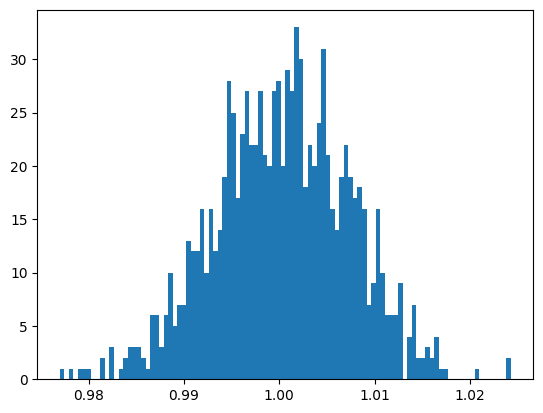

In [16]:
a = np.linalg.norm(g, axis=1, ord=2)/np.sqrt(n)
plt.hist(a, bins=100)